In [17]:
from scipy.ndimage import correlate
from skimage import color, io, measure, img_as_ubyte, morphology
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from skimage.util import img_as_int
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform
import math
from skimage import segmentation
from skimage.color import label2rgb

In [5]:
def load_show(img):
    im = io.imread(img)
    io.imshow(im)
    io.show()
    return im
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

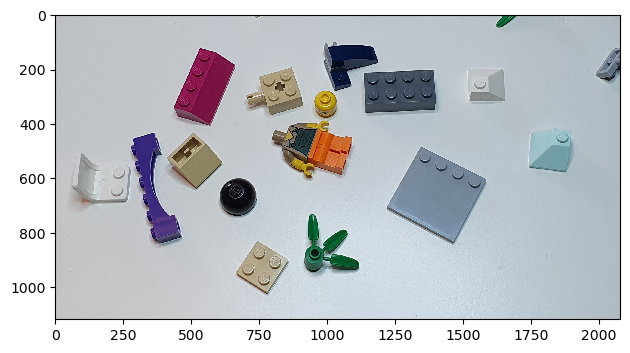

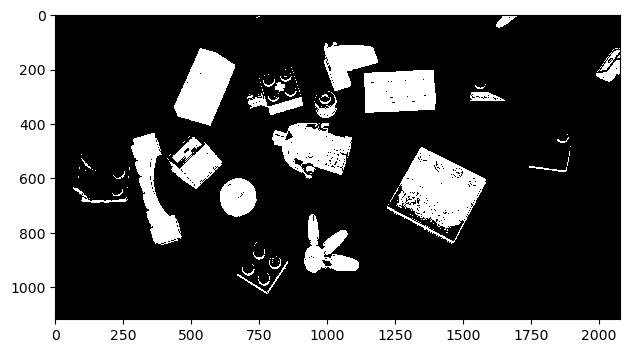

In [24]:
img = load_show("data/lego_4_small.png")
img_gray = color.rgb2gray(img)
bin_img = img_gray <= threshold_otsu(img_gray)
io.imshow(bin_img)

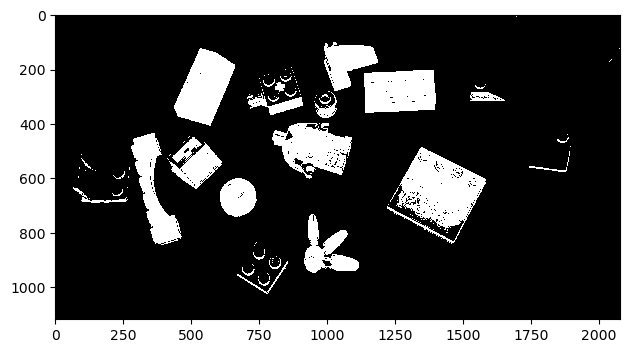

In [27]:
img_cleared = segmentation.clear_border(bin_img)
io.imshow(img_cleared)

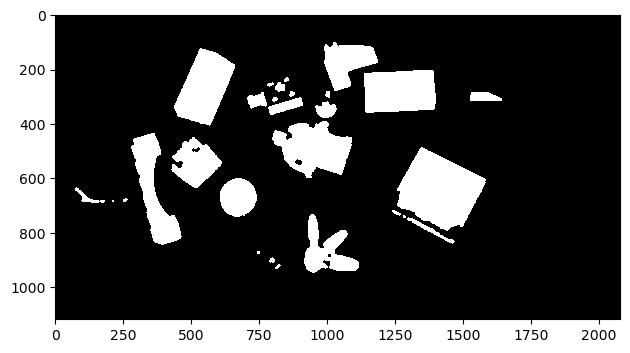

In [32]:
im_closed = opening(closing(img_cleared, disk(5)), disk(5))
io.imshow(im_closed)

In [33]:
label_img = measure.label(im_closed)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 29


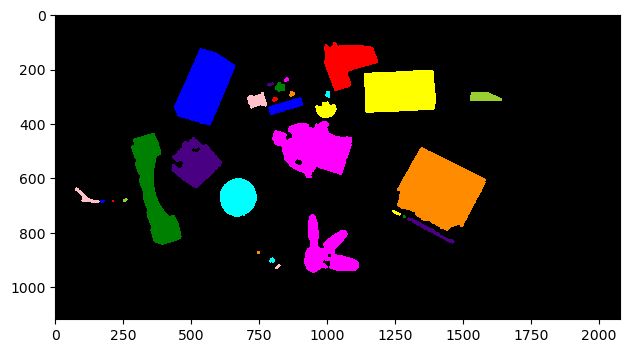

In [38]:
io.imshow(label2rgb(label_img))

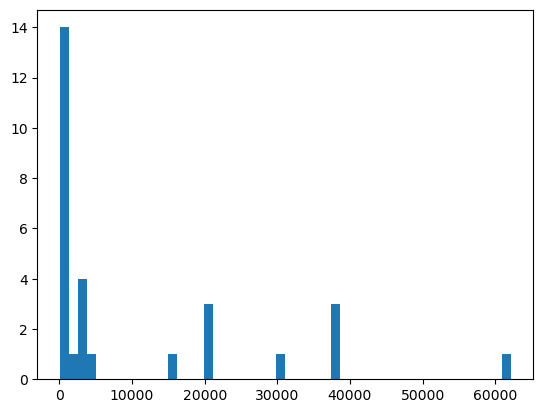

In [39]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

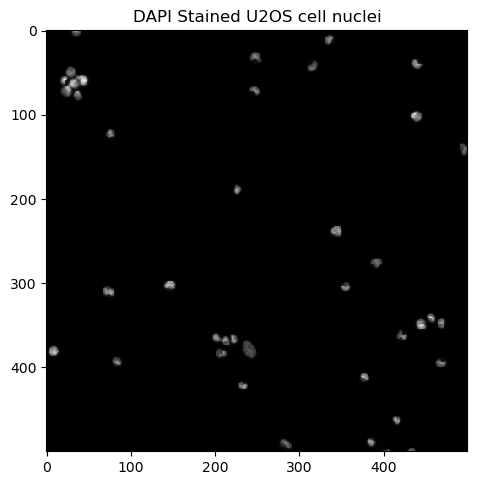

In [42]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

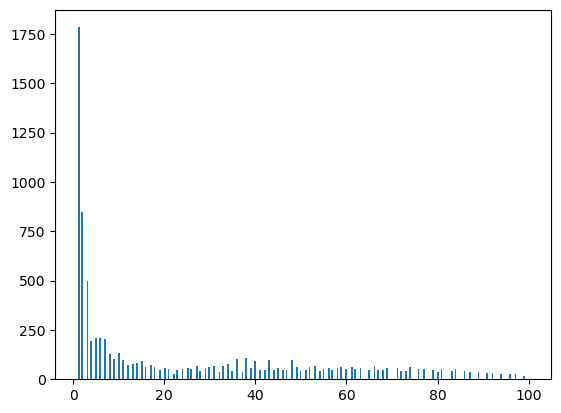

In [43]:
# avoid bin with value 0 due to the very large number of background pixels
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

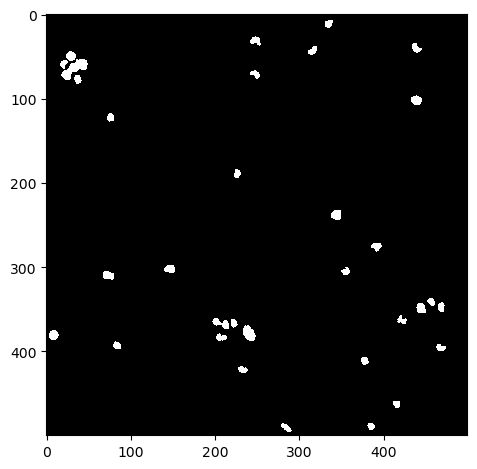

In [58]:
bin_img = img_gray >= threshold_otsu(img_gray)
cleared = segmentation.clear_border(bin_img)
io.imshow(cleared)

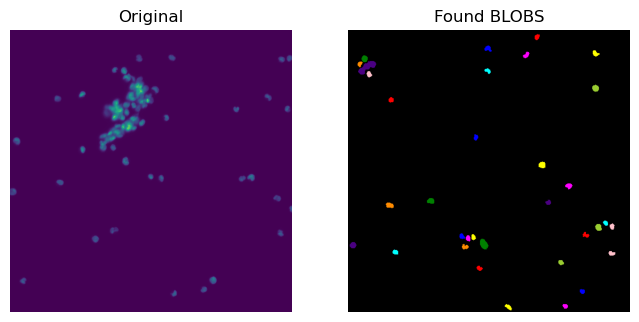

In [60]:
label_img = measure.label(cleared)
image_label_overlay = label2rgb(label_img)
show_comparison(img_org, image_label_overlay, 'Found BLOBS')

In [61]:
region_props = measure.regionprops(label_img)

In [62]:
areas = np.array([prop.area for prop in region_props])

In [73]:
areas.max()

365

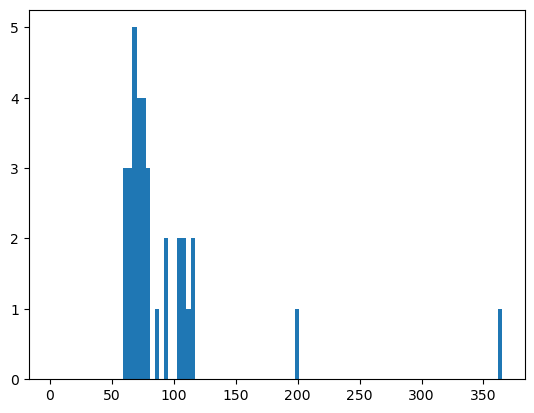

In [71]:
plt.hist(areas.ravel(), bins=100, range=(1, 365))
io.show()

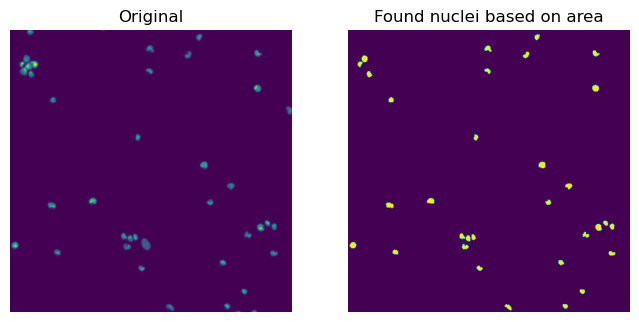

In [74]:
min_area = 50
max_area = 125

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

In [75]:
perimeters = np.array([prop.perimeter for prop in region_props])